# understanding data 

Dataset loaded successfully!
Shape: (3259, 11)

=== Dataset Head ===
        id    subreddit                                              title  \
0  1mzgkc7  datascience  Weekly Entering & Transitioning - Thread 25 Au...   
1  1n105of  datascience                                        Airbnb Data   
2  1n17500  datascience  What exactly is "prompt engineering" in data s...   
3  1n191lg  datascience  NVIDIA AI Released Jet-Nemotron: 53x Faster Hy...   
4  1n035we  datascience  Is the market really like this? The reality fo...   

                                            selftext  title_length  \
0   \n\nWelcome to this week's entering & transit...            13   
1  Hey everyone,\n\nI work on the data team at [A...             2   
2  I keep seeing people talk about prompt enginee...             8   
3  NVIDIA Jet-Nemotron is a new LLM series which ...            10   
4  Hello . I’m a recent Master of Science in Anal...            15   

   text_length  num_links  post_hour   po

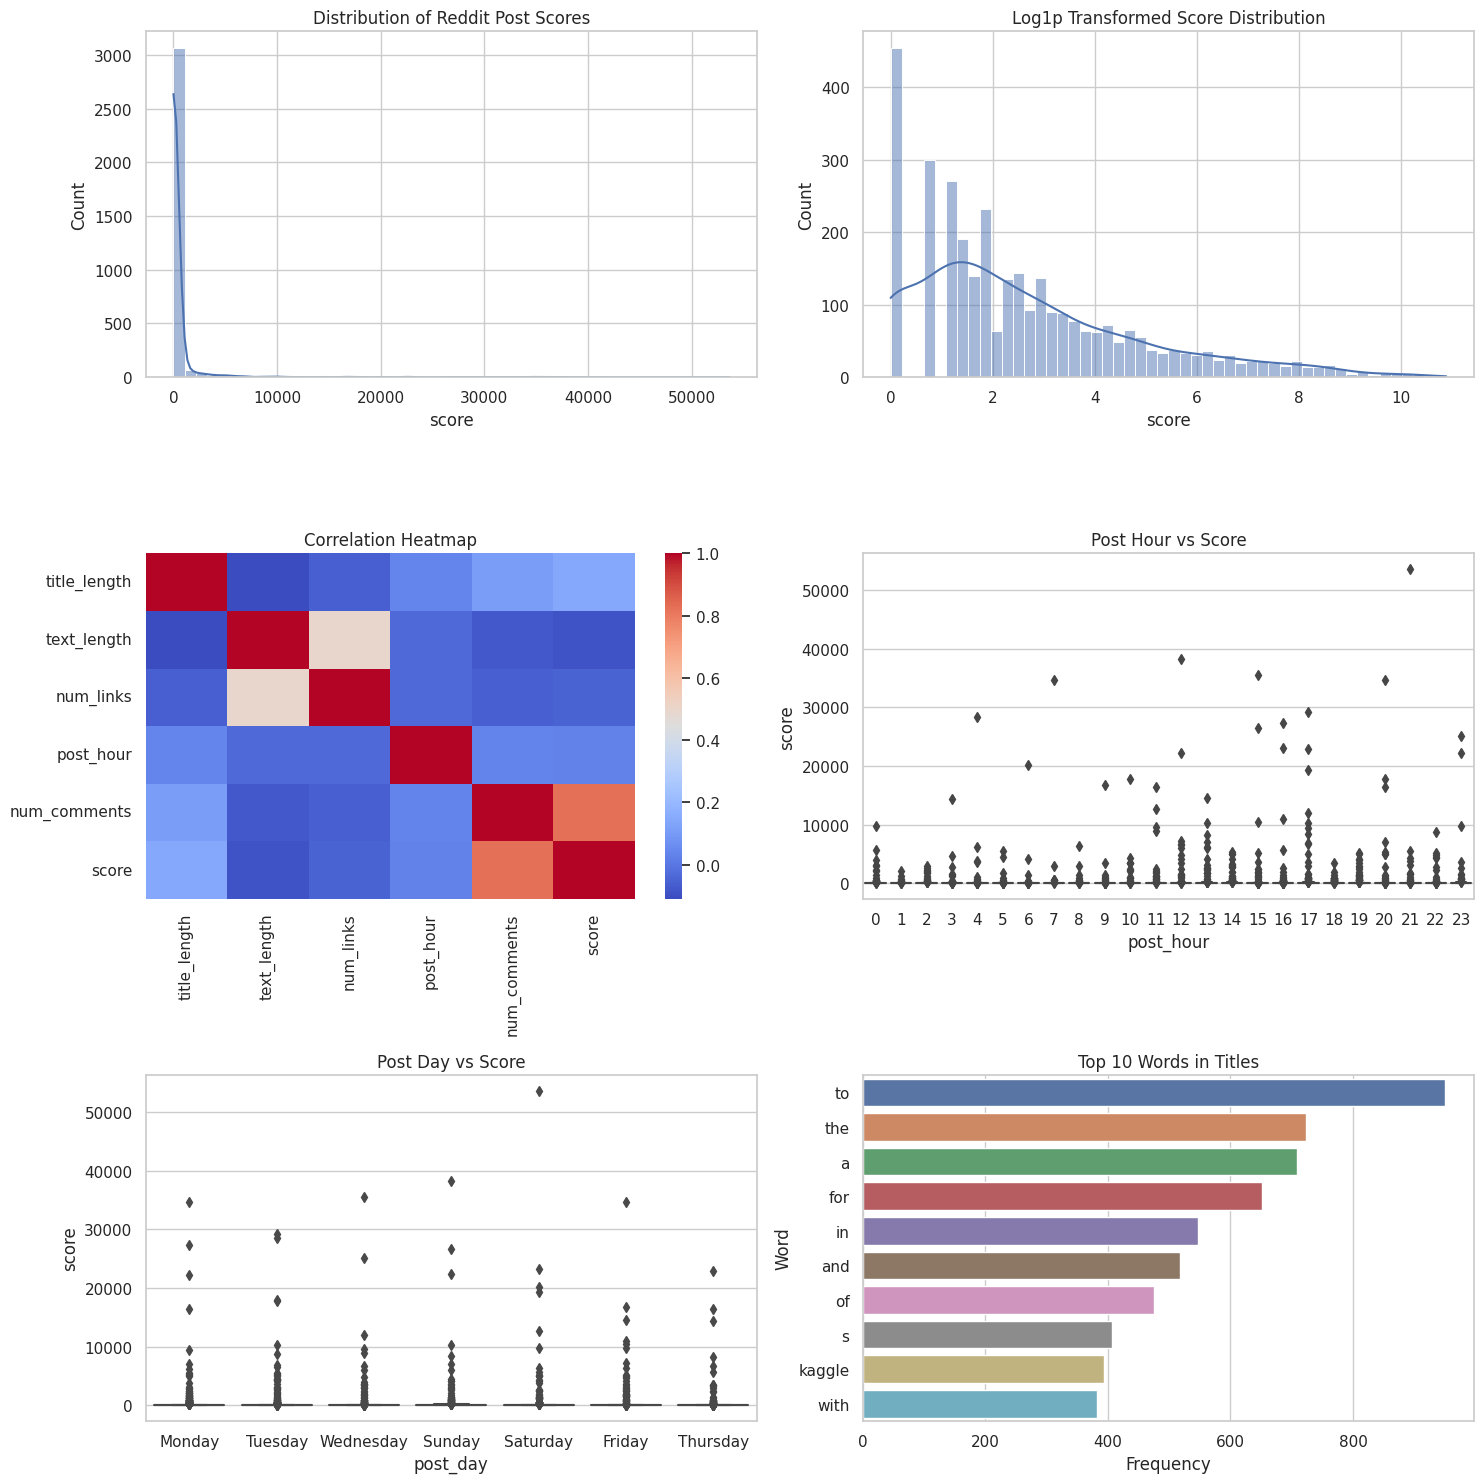


Number of potential score outliers: 560
         id    subreddit  score  num_comments
1   1n105of  datascience    222            23
4   1n035we  datascience    183           120
14  1mxrbck  datascience    243            19
20  1mu3c6j  datascience   2260           143
24  1msw56a  datascience    441            31

=== EDA Complete ===


In [1]:


# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings

# Ignore all warnings (Optional: you can also set to 'once' if you want to see only the first occurrence)
warnings.filterwarnings("ignore")

# Set display & plot style
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# 2. Load Dataset
file_path = "/kaggle/input/reddit-data/reddit_posts.csv"  
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

# 3. Dataset Preview
print("\n=== Dataset Head ===")
print(df.head())

print("\n=== Data Types and Non-Null Counts ===")
print(df.info())

print("\n=== Missing Values ===")
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
print(pd.DataFrame({"MissingCount": missing_counts, "MissingPercent": missing_percent}))

print("\n=== Summary Statistics (Numeric) ===")
print(df.describe())


# this one return categorical feature in dataset
print("\n=== Unique Values in Categorical Columns ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")





fig, axes = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

#  Score Distribution
sns.histplot(df['score'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Reddit Post Scores")

#  Log-Transformed Score Distribution
sns.histplot(np.log1p(df['score']), bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Log1p Transformed Score Distribution")

#  Correlation Heatmap
numeric_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=False, cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title("Correlation Heatmap")

#  Post Hour vs Score
sns.boxplot(x='post_hour', y='score', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Post Hour vs Score")

#  Post Day vs Score
sns.boxplot(x='post_day', y='score', data=df, ax=axes[2, 0])
axes[2, 0].set_title("Post Day vs Score")

#  Top 10 Words in Titles
titles = df['title'].dropna().tolist()
words = re.findall(r'\w+', ' '.join(titles).lower())
word_counts = Counter(words)
top_words_df = pd.DataFrame(word_counts.most_common(10), columns=["Word", "Frequency"])
sns.barplot(data=top_words_df, x="Frequency", y="Word", ax=axes[2, 1])
axes[2, 1].set_title("Top 10 Words in Titles")

# Save the combined plot
plt.tight_layout()
plt.savefig("combined_eda_plots.png", dpi=300)
plt.show()

# =====================
# Outlier Detection
# =====================
Q1 = df['score'].quantile(0.25)
Q3 = df['score'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['score'] < Q1 - 1.5*IQR) | (df['score'] > Q3 + 1.5*IQR)]

print(f"\nNumber of potential score outliers: {outliers.shape[0]}")
print(outliers[['id','subreddit','score','num_comments']].head())

print("\n=== EDA Complete ===")


In [2]:
plt.tight_layout()

# Save figure to file (high resolution)
output_path = "reddit_eda_summary.png"
fig.savefig(output_path, dpi=300, bbox_inches='tight')

print(f"\n✅ Composite EDA plot saved as: {output_path}")

# Display the figure
plt.show()


✅ Composite EDA plot saved as: reddit_eda_summary.png


<Figure size 640x480 with 0 Axes>

<style>
.light-table th, .light-table td {
    background-color: #ffffff !important;
    color: #000000 !important;
    border: 1px solid #000000 !important;
    padding: 6px !important;
}
.light-table th {
    background-color: #e6f7ff !important;
    font-weight: bold !important;
}
</style>

<div style="background-color:#cceeff; color:#000; padding:20px; border-radius:8px; font-family:Segoe UI, sans-serif;">

<h2>📊 Reddit Posts Dataset – EDA Summary</h2>
<hr style="border: none; border-top: 1px solid #000;" />

<h3>1. Dataset Overview</h3>
<ul>
  <li><b>Rows:</b> 3,259</li>
  <li><b>Columns:</b> 11</li>
  <li><b>Subreddits:</b> 5 unique</li>
</ul>

<h3>2. Missing Values</h3>
<table style="border-collapse: collapse; width: 100%;">
<thead>
<tr>
<th style="border: 1px solid #000; padding: 6px; background-color:#e6f7ff !important; color:#000 !important;">Column</th>
<th style="border: 1px solid #000; padding: 6px; background-color:#e6f7ff !important; color:#000 !important;">Missing Count</th>
<th style="border: 1px solid #000; padding: 6px; background-color:#e6f7ff !important; color:#000 !important;">Missing %</th>
</tr>
</thead>
<tbody>
<tr>
<td style="border: 1px solid #000; padding: 6px; background-color:#ffffff !important; color:#000 !important;">selftext</td>
<td style="border: 1px solid #000; padding: 6px; background-color:#ffffff !important; color:#000 !important;">1,225</td>
<td style="border: 1px solid #000; padding: 6px; background-color:#ffffff !important; color:#000 !important;">37.59%</td>
</tr>
<tr>
<td style="border: 1px solid #000; padding: 6px; background-color:#ffffff !important; color:#000 !important;">Others</td>
<td style="border: 1px solid #000; padding: 6px; background-color:#ffffff !important; color:#000 !important;">0</td>
<td style="border: 1px solid #000; padding: 6px; background-color:#ffffff !important; color:#000 !important;">0%</td>
</tr>
    
</tbody>
</table>
<small><i>Note:</i> Missing selftext occurs for link/image posts that lack body text.</small>

<h3>3. Numeric Summary</h3>
<table style="border-collapse: collapse; width: 100%;">
<thead>
<tr>
<th style="border: 1px solid #000; padding: 6px; background-color:#e6f7ff !important; color:#000 !important;">Metric</th>
<th style="border: 1px solid #000; padding: 6px; background-color:#e6f7ff !important; color:#000 !important;">Mean</th>
<th style="border: 1px solid #000; padding: 6px; background-color:#e6f7ff !important; color:#000 !important;">Std</th>
<th style="border: 1px solid #000; padding: 6px; background-color:#e6f7ff !important; color:#000 !important;">Min</th>
<th style="border: 1px solid #000; padding: 6px; background-color:#e6f7ff !important; color:#000 !important;">Max</th>
</tr>
</thead>
<tbody>
<tr>
<td style="border: 1px solid #000; padding: 6px; background-color:#ffffff !important; color:#000 !important;">Score</td>
<td style="border: 1px solid #000; padding: 6px; background-color:#ffffff !important; color:#000 !important;">414.88</td>
<td style="border: 1px solid #000; padding: 6px; background-color:#ffffff !important; color:#000 !important;">2,425.31</td>
<td style="border: 1px solid #000; padding: 6px; background-color:#ffffff !important; color:#000 !important;">0</td>
<td style="border: 1px solid #000; padding: 6px; background-color:#ffffff !important; color:#000 !important;">53,602</td>
</tr>
<!-- Repeat same styling for all rows -->
</tbody>
</table>

<h3>4. Outlier Info</h3>
<p><b>Potential outliers in score:</b> 560 posts (~17% of dataset).</p>

<!-- Apply same table cell styling to all tables below -->
<!-- Skipping repeating full tables for brevity, but apply identical th/td styles -->

<h3>5. Visual Insights (Summary)</h3>
<ul>
  <li>Scores are heavily right-skewed; log-transform improves distribution shape.</li>
  <li>Number of comments shows strong positive correlation with score.</li>
  <li>Post timing affects score: Certain hours and days have higher medians.</li>
  <li>Common title words: <i>'to', 'the', 'a', 'for', 'in'</i>. We are so gonna fix that</li>
</ul>



</div>
